<center><img src="https://drive.google.com/uc?export=view&id=1ia67jZrMZx4V45HYDM7pxcoZrPJE-NMP" alt="PSUT"  width="180px">  
<p> 
King Hussein School for Computing Sciences <br>
Department of Data Science <br>
Artificial Intelligence Lab <br>
Informed (Heuristic) Search Strategies (1)
</p></center>

@ Bushra Alhijawi

# Problem Solving 

Computer Programmers are problem solvers. In order to solve a problem on a computer you must:

* Know how to represent the information (data) describing the problem. A good programmer will "encode" all the "facts" necessary to represent a problem using  data structure. Further, there are "good ways" and "bad ways" to encode information. Good ways allow the computer to easily "compute" new information.

* Determine the steps to transform the information from one representation into another (ALGORITHM). An algorithm is a set of specific steps to solve a problem. The core of what good programmers do is being able to define the steps necessary to accomplish a goal. **Pseudocode** is an artificial and informal language that helps programmers develop algorithms. Pseudocode is a "text-based" detail (algorithmic) design tool. The rules of Pseudocode are reasonably straightforward. All statements showing "dependency" are to be indented. These include while, do, for, if, switch. For example, 

````
Initialize total to zero

Initialize counter to zero

Input the first grade

while the user has not as yet entered the sentinel

    add this grade into the running total
    add one to the grade counter
    input the next grade (possibly the sentinel)

if the counter is not equal to zero

    set the average to the total divided by the counter
    print the average

else

    print 'no grades were entered'

````




# Searching for Problem 

* Tree Search 

-----------------------------------------------------------------------------

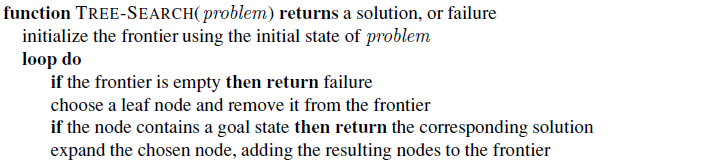

-------------------------------------------------------------------

* Graph search 

---------------------------------------------------------------------

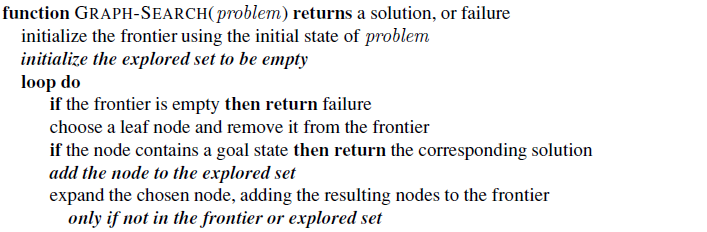

--------------------------------------------------------------------


**Important Terms**: 

* Initial state: the start point.

* Frontier (open list): The set of all leaf nodes available for expansion at any given point.

* Goal state: the target point.

* Explored set (closed list): The set of all expanded nodes at any given point.

# Heuristic Functions


The choice of an evaluation function determines the search strategy. Most best first algorithms include as a component of the evaluation function a heuristic
function, h(n):

* h(n) = estimated ( cost of from the state at node n to a goal state.
* h(n) = 0 if n is a goal node.
* h(n) takes a node as input, but, unlike g(n) n), it depends only on the state at that node.

<u>Example</u>:

* ℎ1= the number of misplaced tiles. ℎ1= 8, all of the eight tiles are out of
position.

* ℎ2= the sum of the distances of the tiles from their goal positions (Manhattan
distance). The distance is the sum of the horizontal and vertical distances. ℎ2= 18.

**Heuristic function provides problem specific knowledge to the search algorithm.**


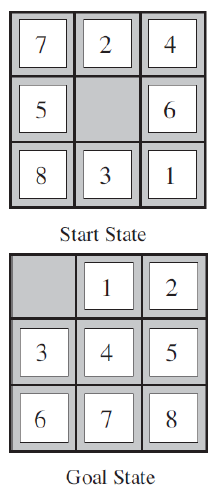

# A* Algorithm 

A* Search algorithm is one of the best and popular technique used in path-finding and graph traversals. A* Search algorithms, unlike other traversal techniques, it has “brains”. What it means is that it is really a smart algorithm which separates it from the other conventional algorithms.

A* search evaluates nodes by combining g(n), the cost to reach the
node, and h(n), the cost to get from the node to the goal:

* f(n) = g(n) + h(n)
* f(n) = estimated cost of the cheapest solution through n


`````

// Initialize both open and closed list
let the openList equal empty list of nodes
let the closedList equal empty list of nodes
// Add the start node
put the startNode on the openList (leave it's f at zero)
// Loop until you find the end
while the openList is not empty
    // Get the current node
    let the currentNode equal the node with the least f value
    remove the currentNode from the openList
    add the currentNode to the closedList
    // Found the goal
    if currentNode is the goal
        Congratz! You've found the end! Backtrack to get path
    // Generate children
    let the children of the currentNode equal the adjacent nodes
    
    for each child in the children
        // Child is on the closedList
        if child is in the closedList
            continue to beginning of for loop
        // Create the f, g, and h values
        child.g = currentNode.g + distance between child and current
        child.h = distance from child to end
        child.f = child.g + child.h
        // Child is already in openList
        if child.position is in the openList's nodes positions
            if the child.g is higher than the openList node's g
                continue to beginning of for loop
        // Add the child to the openList
        add the child to the openList

`````






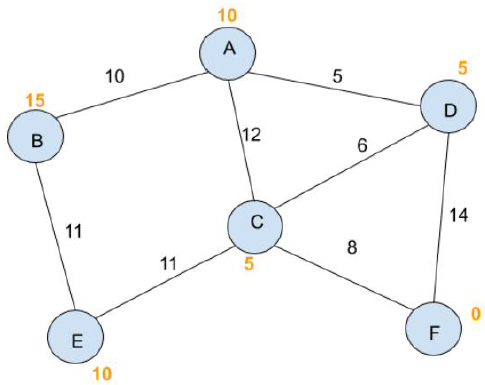




In [ ]:
class Graph:
    # example of adjacency list (or rather map)
#    adjacency_list = {
#      'A': [('B',10),('C',12),('D',5)],
#      'B': [('A',10), ('E', 11)],
#      'C': [('A',12),('D', 6), ('E', 11), ('F', 8)],
#      'D': [('A',5), ('C', 6), ('F', 14)],
#      'E': [('B',11),('C', 11)],
#      'F': [('C', 8),('D', 14)]
# }    


    def __init__(self, adjacency_list, h):
        self.adjacency_list = adjacency_list
        self.H = h

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        return self.H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []
                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]
                reconst_path.append(start_node)
                reconst_path.reverse()
                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [ ]:
G = {
     'A': [('B',10),('C',12),('D',5)],
     'B': [('A',10), ('E', 11)],
     'C': [('A',12),('D', 6), ('E', 11), ('F', 8)],
     'D': [('A',5), ('C', 6), ('F', 14)],
     'E': [('B',11),('C', 11)],
     'F': [('C', 8),('D', 14)]
}

H = {
            'A': 10,
            'B': 15,
            'C': 5,
            'D': 5,
            'E': 10,
            'F': 0
        }

In [ ]:
graph = Graph(G,H)

graph.a_star_algorithm('A','F')

Path found: ['A', 'D', 'F']


['A', 'D', 'F']